<a href="https://colab.research.google.com/github/taruj/Advanced-Regression-Assignment/blob/main/Advanced_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
`Surprise Housing` a US Based Housing company plans to enter the Australian market. The company is looking at prospective properties to buy to enter the market.

Before investing the company would like to `predict the value` of the prospective properties and then decide to invest (or not). 

The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company would also like to know `which factors (features of the houses) that are significant` in predicting the price of a house, and what is the impact of those variables in deciding the price of the house.

### Technical Goals
Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest.
Determine the optimal value of lambda for ridge and lasso regression.
This model will then be used by the management to understand how exactly the prices vary with the variables

### Approach for the Solution
- Exploratory Data Analysis 
- Data cleaning
- Data preparation 
  - Encoding, standardization and normalization
- Model building
- Conclusions 

## Python Notebook Notes
1. Terms - Variable / Feature / Column is used an interchangeable manner. 
2. Conclusion - All conclusions are in <font color="blue"> Blue Color </font>
3. Cautions - All Cautions / Warnings are in <font color="red"> Red Color </font>


Source: "The machine learning community calls them features (also attributes or inputs).  There is a subtle difference in meaning.  In predictive modeling, depending on the nature of the data, considerable work may be required to transform and winnow down data and text to a usable set of predictors.  This process is termed “feature engineering.”  The comparable term in statistics – “variable selection” – does not imply such a wide ranging process." https://www.statistics.com/02-03-2015-week-5-features-vs-variables/

## Import Libraries

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd

# Vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Suppress Warning
import warnings
warnings.filterwarnings("ignore")

import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading the Dataset

from google.colab import drive
drive.mount('/content/drive')

data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Adv-Reg-Assign.csv')
## Data Dictionary: https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Basic Data Exploration

In [2]:
## Get Size of dataset

print(data.shape)


(1460, 81)


<font color="blue"> 1460 Row and 81 Columns

In [3]:
## Identify Features containing less than 60% data 
nulls_data = round(data.isnull().sum()/len(data.index)*100,2)
nulls_data = nulls_data[nulls_data > 40]
nulls_data.sort_values(ascending=False)


PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
dtype: float64

<font color="blue"> The following features have more than 40% missing data.

In [4]:
## Get Categorical and Numerical Data counts

categorical = []
numerical = []
for i in data.columns:
    if data[i].dtypes != 'O':
        numerical.append(i)
    else:
        categorical.append(i)
print("Numerical features: {} and Categorical Features: {}".format(len(numerical), len(categorical)))

Numerical features: 38 and Categorical Features: 43


<font color="blue"> Numerical features: 38 and Categorical Features: 43

In [5]:
## Look at raw data
pd.set_option('display.max_columns',81)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

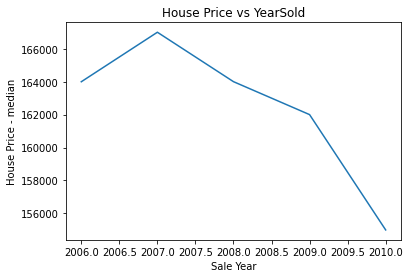

In [7]:
## Evaluate median price changes vs with the year
## This is based on intuation that as the property ages there will be a decline 
data['YrSold'] = data['YrSold'].astype('int')
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Sale Year')
plt.ylabel('House Price - median')
plt.title("House Price vs YearSold")
plt.show()

<font color = "blue"> Sharp decline in house prices can be observed following 2007 and 2008 housing bubble crash </font>

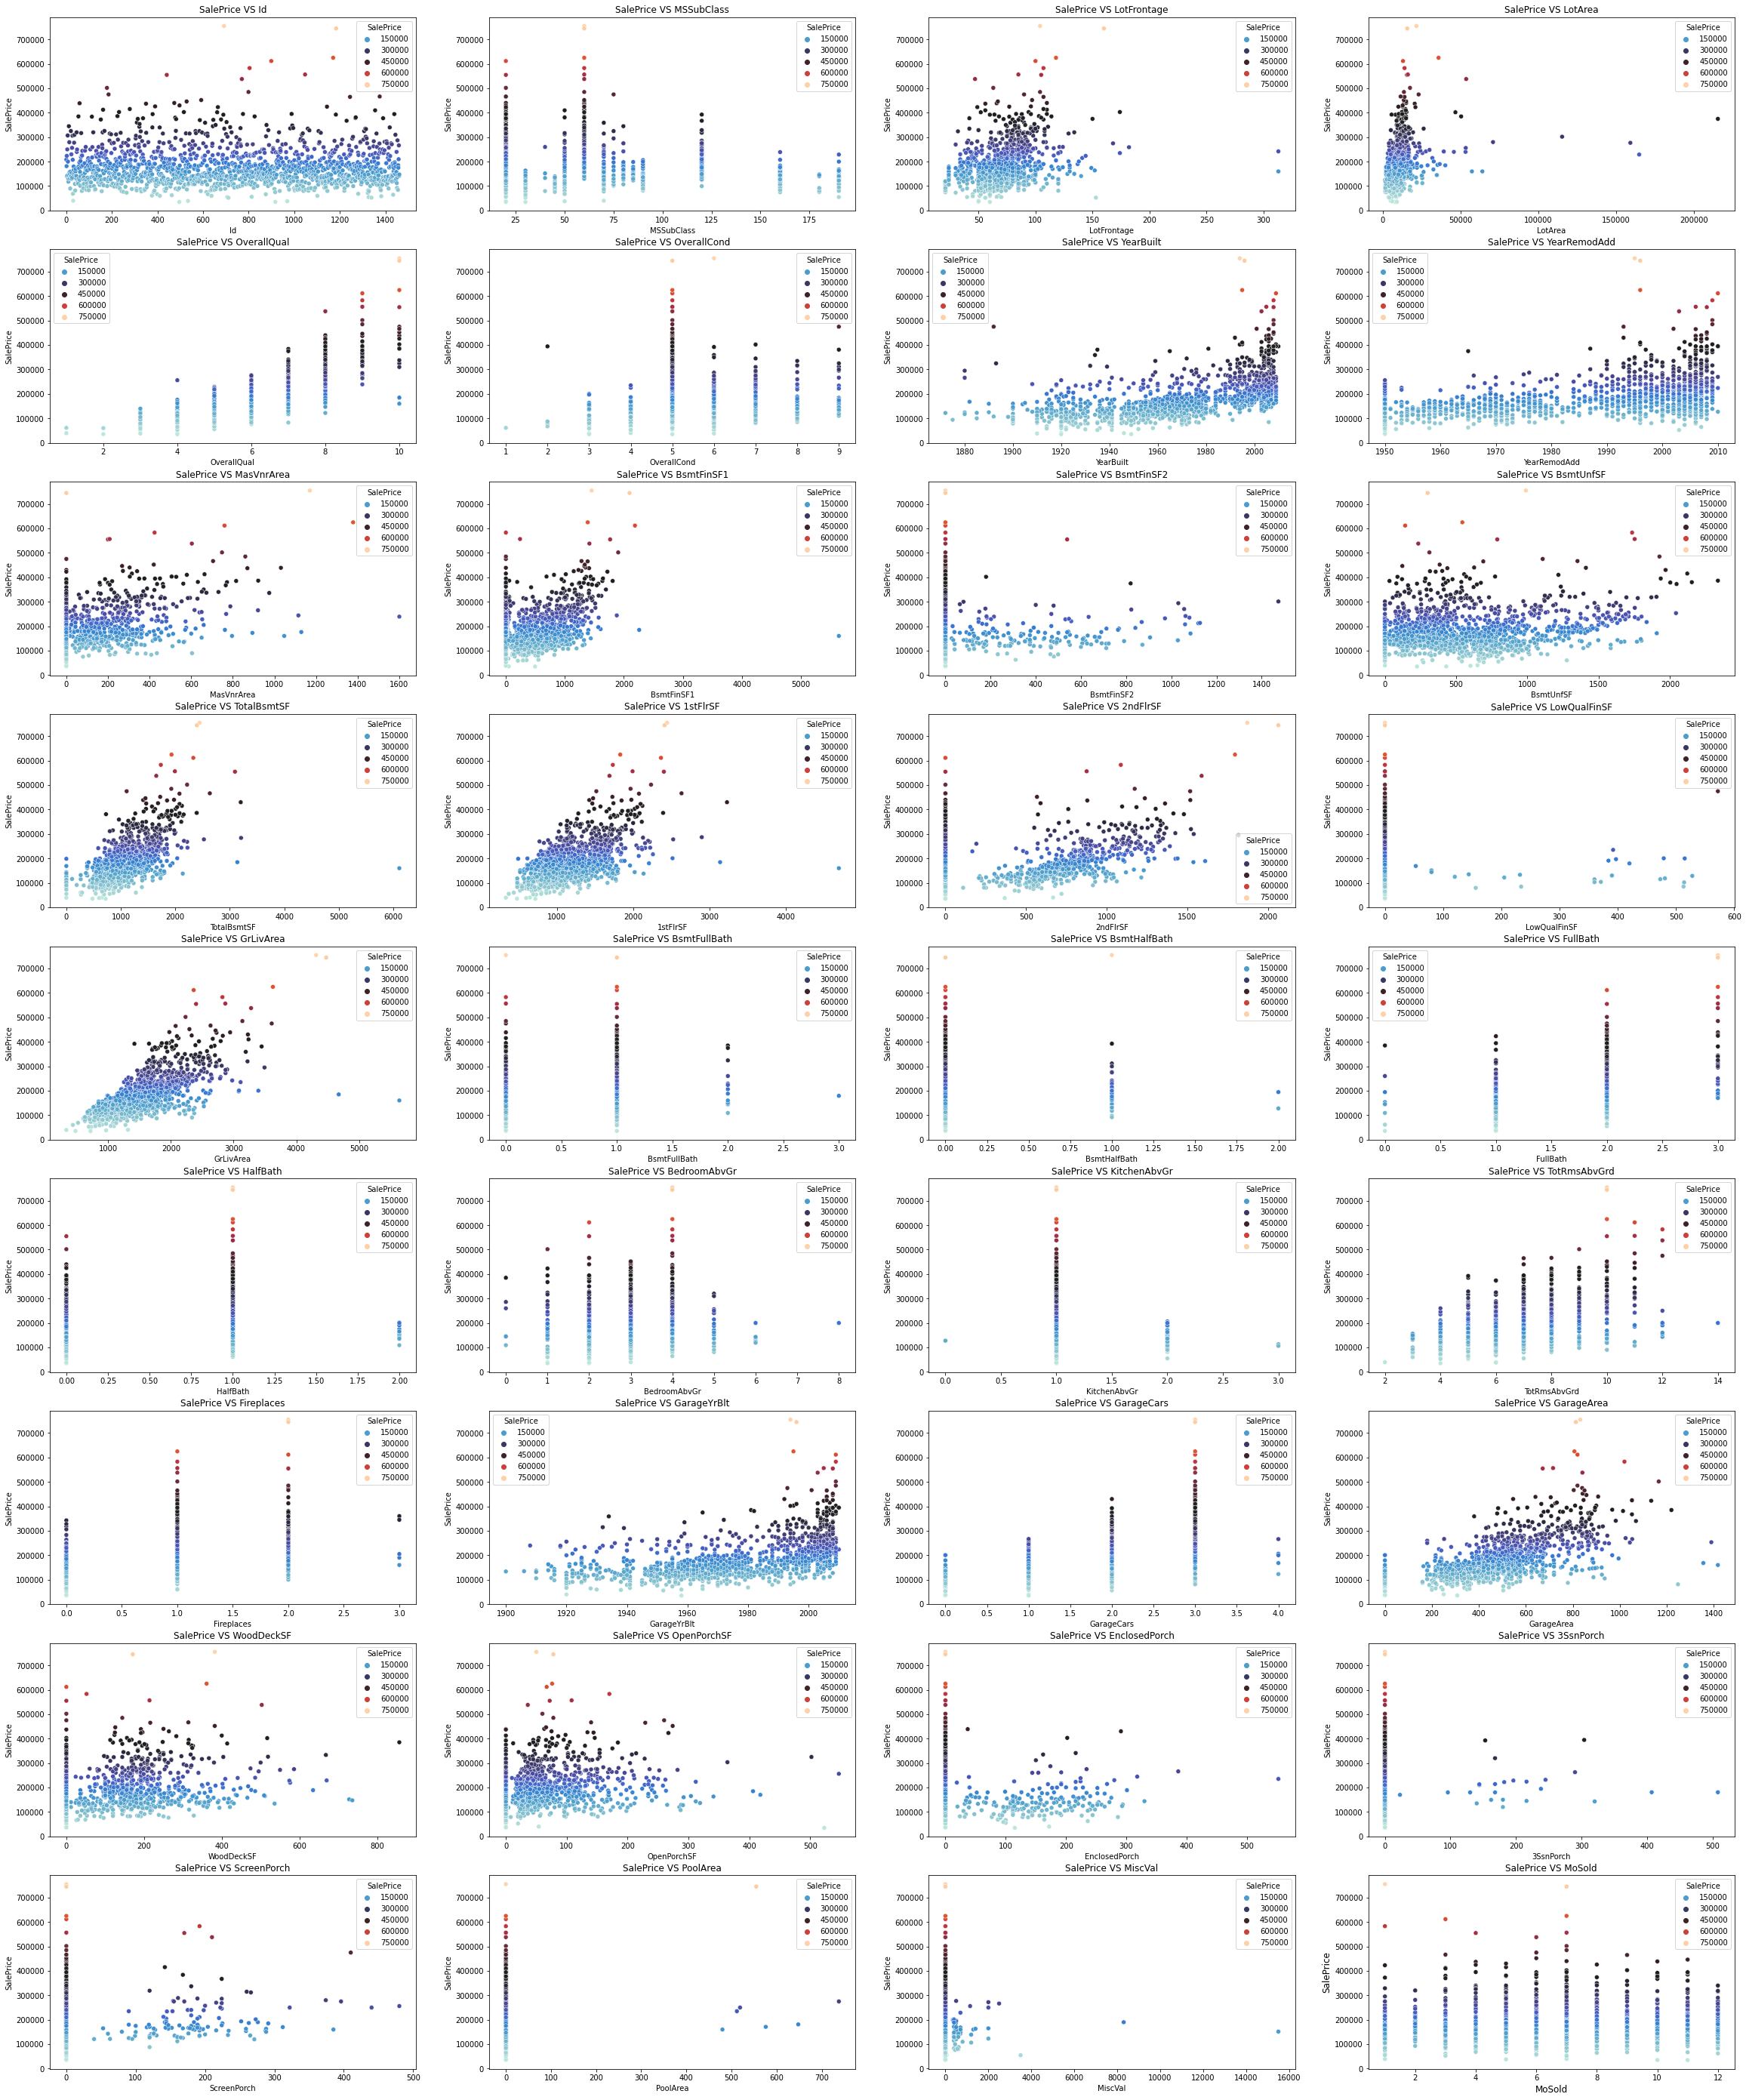

In [8]:
## Create scatter plots to further analyse the spread of data
## This should be viewd both in comparison to other features and individually
numericals = data.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(9,4,figsize=(40,50))
for i,ax in zip(numericals.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=numericals,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

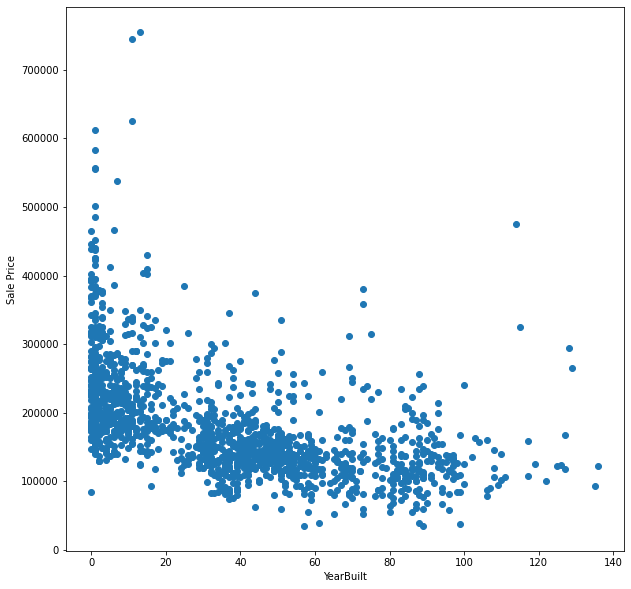

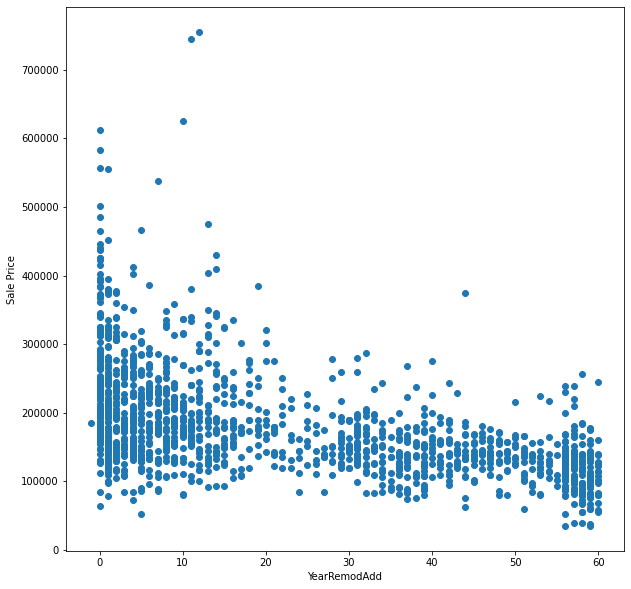

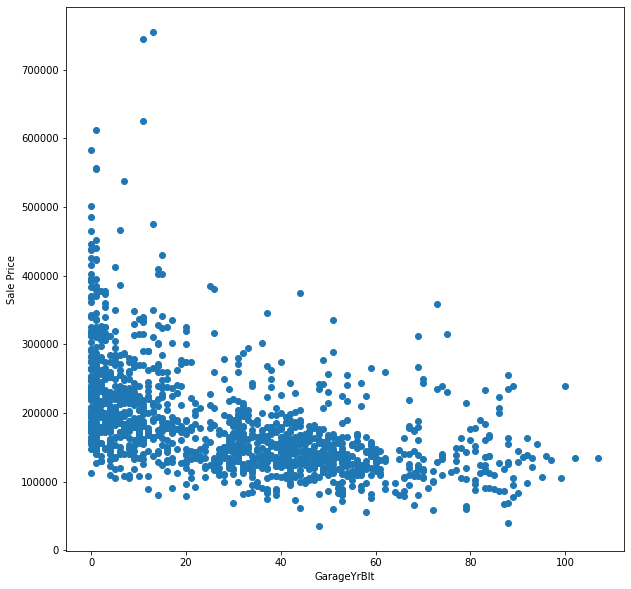

In [9]:
# Comparing the Age of the Building / Renovated Building / Garage with the Sold Price
year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

for feature in year_features:
    if feature!='YrSold':
        data_temp=data.copy()
        plt.figure(figsize=(10,10))
        data_temp[feature]=data_temp['YrSold']-data[feature]
        plt.scatter(data_temp[feature],data_temp['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

<font color="blue"> 
1. We have observed several features have missing data
2. Based on the data disctionary we features have numerical variables in categorical features (MSSubClass)
3. ID contains only Unique Identification Numbers that will add no value to the Predications
4. Older Properties are cheaper than Newer Properties
5. Property Prices and Total Basement Area seem to be have a direct corelation. There is a Linear Relationship it seems.
Property Prices and GRLiving Area seem to be have a direct corelation


## Data Cleaning and Transformation

In [10]:
def missing_values(df):
   missing_data_ = pd.DataFrame({"Column":df.columns,"Missing %":['%.2f' % (a/len(df)*100) for a in df.isnull().sum()],
   "Feature":["Continuous" if df[col].dtype != 'O' else "Ordinal" for col in df.columns ]}) 
   return missing_data_

In [11]:
temp_data = missing_values(data)
temp_data[temp_data["Missing %"]!="0.00"].sort_values(by="Missing %",ascending=False)

Column Missing %     Feature
72        PoolQC     99.52     Ordinal
74   MiscFeature     96.30     Ordinal
6          Alley     93.77     Ordinal
73         Fence     80.75     Ordinal
64    GarageCond      5.55     Ordinal
58    GarageType      5.55     Ordinal
59   GarageYrBlt      5.55  Continuous
60  GarageFinish      5.55     Ordinal
63    GarageQual      5.55     Ordinal
57   FireplaceQu     47.26     Ordinal
32  BsmtExposure      2.60     Ordinal
35  BsmtFinType2      2.60     Ordinal
30      BsmtQual      2.53     Ordinal
31      BsmtCond      2.53     Ordinal
33  BsmtFinType1      2.53     Ordinal
3    LotFrontage     17.74  Continuous
26    MasVnrArea      0.55  Continuous
25    MasVnrType      0.55     Ordinal
42    Electrical      0.07     Ordinal

In [12]:
## Drop the ID Column
## This will not add value to the prediction of house prices
data.drop("Id",axis=1,inplace=True)

In [13]:
## Less than 1% of houses have pool (and pool area)
## These will not add to prediction of house prices
data.drop(["PoolQC","PoolArea"],axis=1,inplace=True)

In [14]:
## Convert Shed true / false value as 49 Houses have Sheds
data["Shed"]=np.where(data['MiscFeature']=='Shed',1,0)
data.drop("MiscFeature",axis=1,inplace=True)

In [15]:
temp_data = missing_values(data)
temp_data[temp_data["Missing %"]!="0.00"].sort_values(by="Missing %",ascending=False)

Column Missing %     Feature
5          Alley     93.77     Ordinal
70         Fence     80.75     Ordinal
63    GarageCond      5.55     Ordinal
62    GarageQual      5.55     Ordinal
59  GarageFinish      5.55     Ordinal
58   GarageYrBlt      5.55  Continuous
57    GarageType      5.55     Ordinal
56   FireplaceQu     47.26     Ordinal
34  BsmtFinType2      2.60     Ordinal
31  BsmtExposure      2.60     Ordinal
32  BsmtFinType1      2.53     Ordinal
30      BsmtCond      2.53     Ordinal
29      BsmtQual      2.53     Ordinal
2    LotFrontage     17.74  Continuous
25    MasVnrArea      0.55  Continuous
24    MasVnrType      0.55     Ordinal
41    Electrical      0.07     Ordinal

### Individually Identify and Transform data as per Requirement

In [16]:
## Lot Frontage Stats
data.LotFrontage.describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [17]:
# Fill the null values for the features

fill_=["GarageType","Alley","Fence","FireplaceQu","BsmtFinType1","BsmtFinType2","BsmtQual","BsmtCond",
           "BsmtExposure","GarageFinish","GarageQual","GarageCond","MasVnrType"]
for f in fill_:
    data[f].fillna("No",inplace=True)

In [18]:
temp_data = missing_values(data)
temp_data[temp_data["Missing %"]!="0.00"].sort_values(by="Missing %",ascending=False)

Column Missing %     Feature
58  GarageYrBlt      5.55  Continuous
2   LotFrontage     17.74  Continuous
25   MasVnrArea      0.55  Continuous
41   Electrical      0.07     Ordinal

In [19]:
## OverallQual: Catagorical variable with numeric catagories
## Convert Numbers to Categories
map_ = {1:"VP",2:"PO",3:"FA",4:"BA",5:"AV",6:"AA",7:"GO",8:"VG",9:"EX",10:"VE"}
data.OverallQual=data.OverallQual.map(map_)
data.OverallQual.value_counts()

AV    397
AA    374
GO    319
VG    168
BA    116
EX     43
FA     20
VE     18
PO      3
VP      2
Name: OverallQual, dtype: int64

In [20]:
## MSSubClass is a catagorical variable with numeric catagories
## Convert Numbers to Categories
## Value Count of the MSSubClass
print(sorted(data.MSSubClass.value_counts().index))

map_={20:"1storyNew",30:"1storyOld",40:"1storywAttic",45:"1_5storyUnF",50:"1_5storyF",60:"2storyNew",70:"2storyOld",75:"2_5story",
      80:"Multi",85:"Split",90:"Duplex",120:"1storyPUDnew",160:"2storyPUDnew",180:"PUDmulti",190:"2Family"}

data.MSSubClass = data.MSSubClass.map(map_)

[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]


In [21]:
## Value Count of the MSSubClass
data.MSSubClass.value_counts()

1storyNew       536
2storyNew       299
1_5storyF       144
1storyPUDnew     87
1storyOld        69
2storyPUDnew     63
2storyOld        60
Multi            58
Duplex           52
2Family          30
Split            20
2_5story         16
1_5storyUnF      12
PUDmulti         10
1storywAttic      4
Name: MSSubClass, dtype: int64

In [22]:
## Lot Frontage - Data stats
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

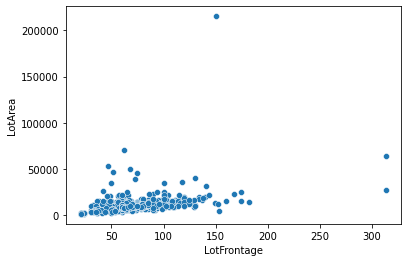

In [23]:
## Look for LotArea and Frontage Relationship
sns.scatterplot(data=data,x='LotFrontage',y='LotArea')

<font color="blue"> Quite a lot of otliers exist.

In [24]:
## Remove the outliers in LotFrontage
temp_df1 = data[data.LotArea<100000]
temp_df2 = temp_df1[temp_df1.LotFrontage<200]

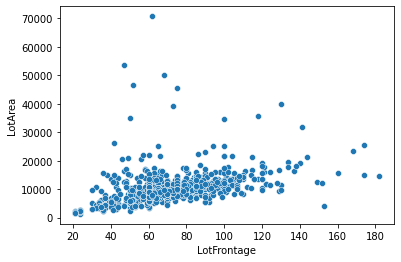

In [25]:
## Look for LotArea and Frontage Relationship again
sns.scatterplot(data=temp_df2,x='LotFrontage',y='LotArea')
plt.show()

In [26]:
## Fill up the remaining values as NA
data[data.LotFrontage.isna()].LotArea


7       10382
12      12968
14      10920
16      11241
24       8246
        ...  
1429    12546
1431     4928
1441     4426
1443     8854
1446    26142
Name: LotArea, Length: 259, dtype: int64

In [27]:
## Get Stats after NA
data[data.LotFrontage.isna()].LotArea.describe()

count       259.000000
mean      13137.370656
std       16215.264451
min        1974.000000
25%        8065.500000
50%       10624.000000
75%       13018.500000
max      164660.000000
Name: LotArea, dtype: float64

In [28]:
# Large Sperad of Data so we can use the technique of blocks for fill
data['Lotcat']=pd.cut(data.LotArea,bins=10,labels=[1,2,3,4,5,6,7,8,9,10],include_lowest=True)
data.LotFrontage=data.groupby('Lotcat')["LotFrontage"].apply(lambda x: x.fillna(x.mean()))
data.drop("Lotcat",axis=1,inplace=True)

In [29]:
## Reevaluate Missing Values
temp_data = missing_values(data)
temp_data[temp_data["Missing %"]!="0.00"].sort_values(by="Missing %",ascending=False)

Column Missing %     Feature
58  GarageYrBlt      5.55  Continuous
25   MasVnrArea      0.55  Continuous
2   LotFrontage      0.21  Continuous
41   Electrical      0.07     Ordinal

In [30]:
## Stats for GarageYrBlt
data[data.GarageYrBlt.isna()].YearBuilt.describe()

count      81.000000
mean     1942.481481
std        29.664841
min      1872.000000
25%      1920.000000
50%      1940.000000
75%      1970.000000
max      2007.000000
Name: YearBuilt, dtype: float64

In [31]:
## Fill GarageYrBlt
data[data.GarageYrBlt.isna()].YearBuilt.describe()


count      81.000000
mean     1942.481481
std        29.664841
min      1872.000000
25%      1920.000000
50%      1940.000000
75%      1970.000000
max      2007.000000
Name: YearBuilt, dtype: float64

In [32]:
## Stats for Electrical
data[data.Electrical.isna()].Electrical.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Electrical, dtype: object

In [33]:
## Fill data
data.Electrical.fillna(data.Electrical.mode(),inplace=True)

In [34]:
## Fill the NAs with the median value for the Electrical Feature
data.Electrical.fillna(data.Electrical.mode(),inplace=True)

In [35]:
## Imputing the YearBuilt in GarageBuilt
data.GarageYrBlt.fillna(data.YearBuilt,inplace=True) 

In [36]:
data.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [37]:
data[data.LotFrontage.isna()].LotArea

249    159000
335    164660
706    115149
Name: LotArea, dtype: int64

In [38]:
## Drop Lot area larger than 100000
newdata = data[data.LotArea<100000]
data = newdata

In [39]:
## Update the null values where Masonry veneer is NA to 0
data.MasVnrArea.fillna(0,inplace=True)

<font color="blue"> All missing data handled 

### Data Visulization

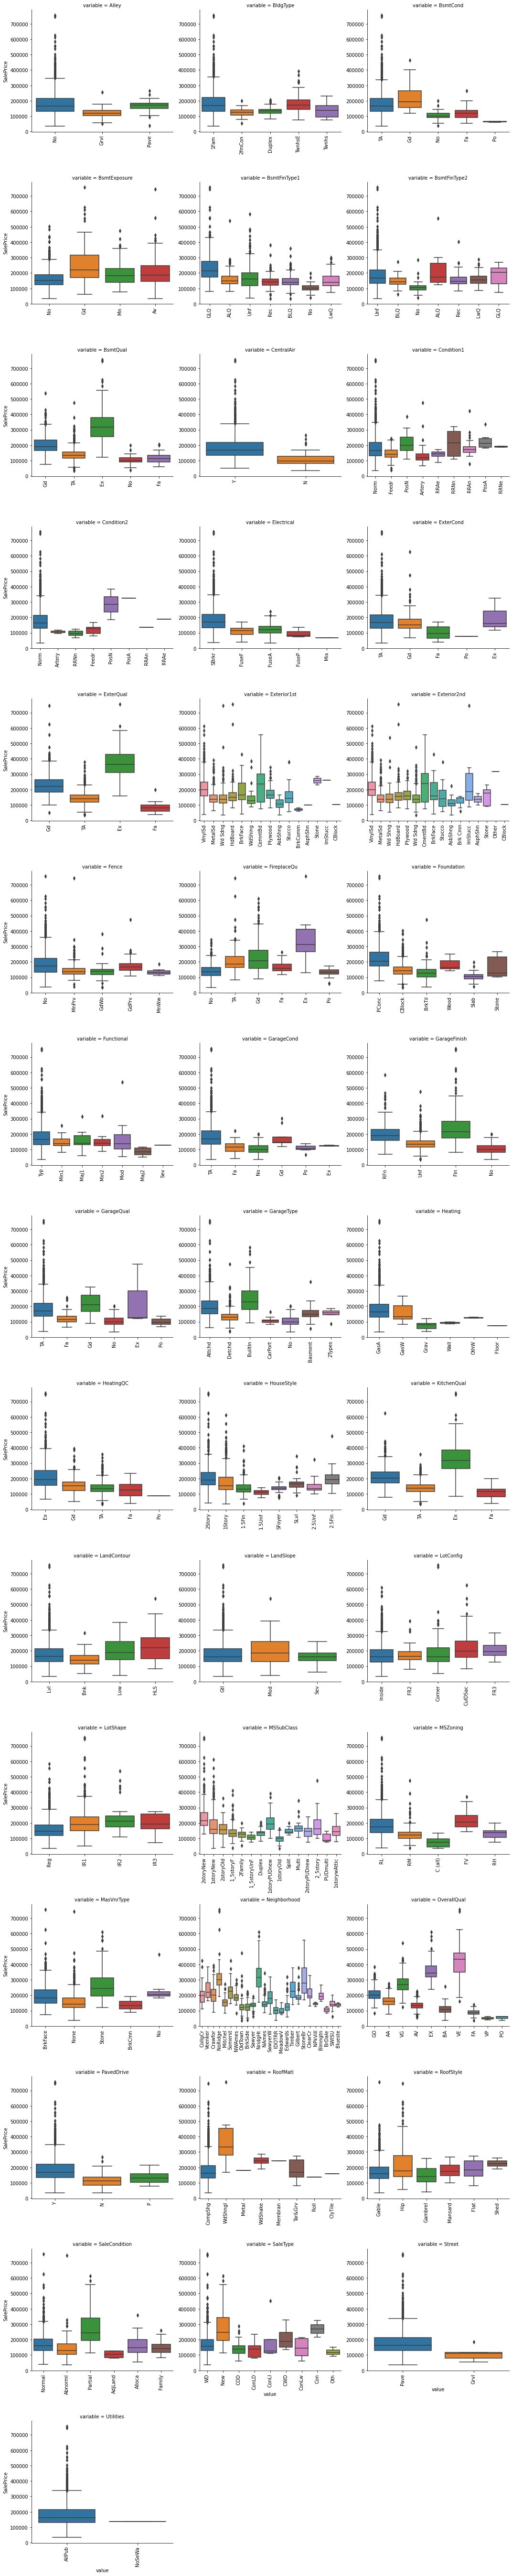

In [40]:
## Categorical Features vs Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = data.select_dtypes(exclude=['int64','float64'])
f = pd.melt(data, id_vars=['SalePrice'], value_vars=sorted(data[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

<font color="blue"> 1. Higher Property prices if the basement quality is Good or Excellent <p> </font>
<font color="blue"> 2. Higher Property prices if the basement is Good and Excellent  <p> </font>
<font color="blue"> 3. Higher Property prices if the Kitchen is Good Quality <p> </font>
<font color="blue"> 4. Higher Property prices that have Paved alleys <p> </font>


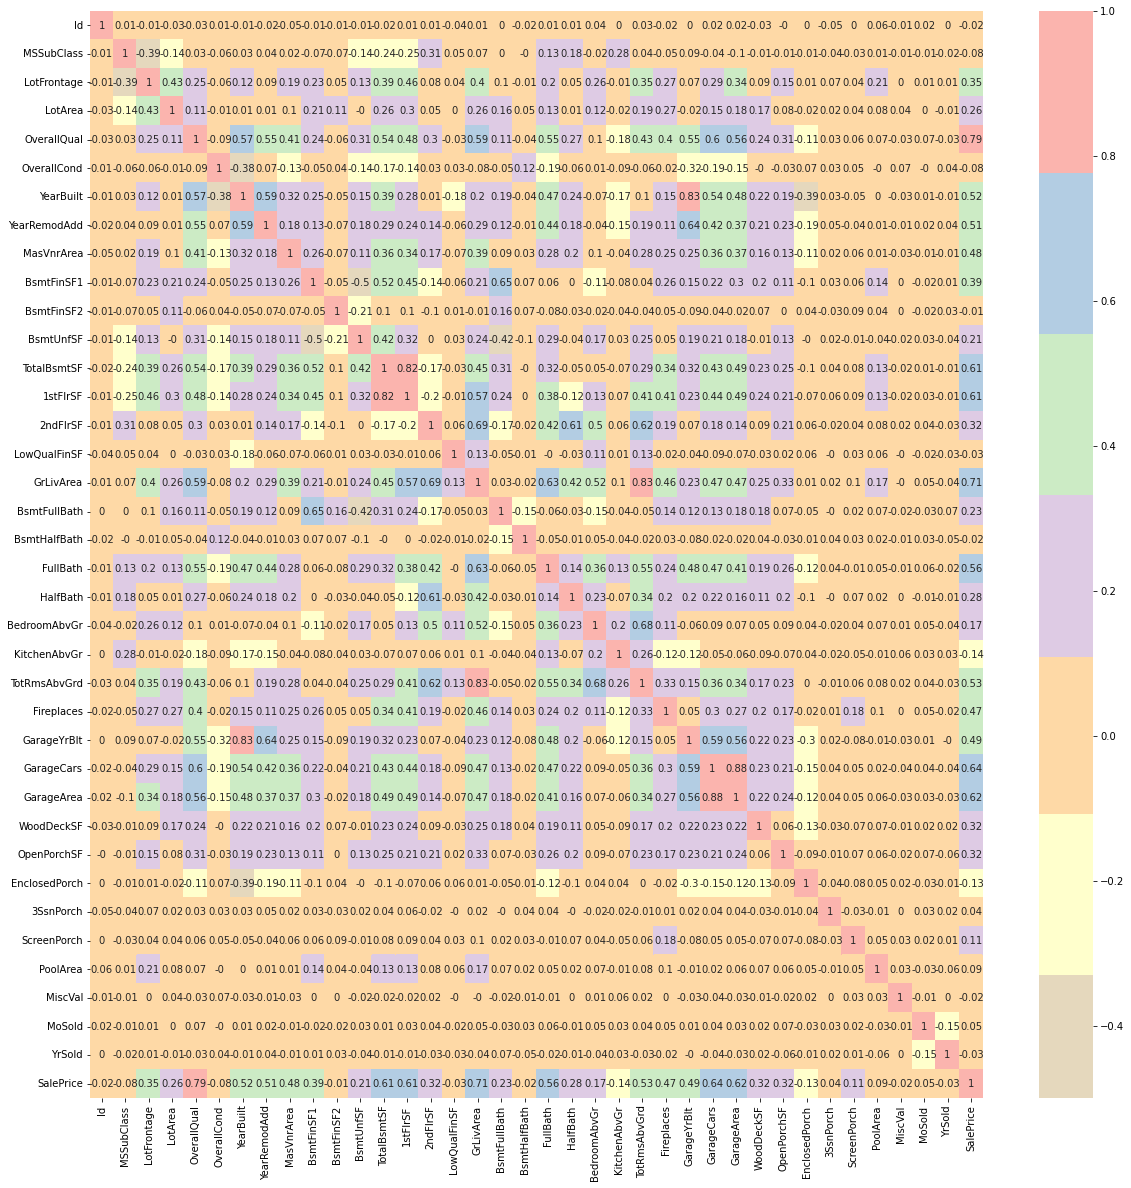

In [41]:
## Plotting the Corelation
plt.subplots(figsize = (20,20))
sns.heatmap(round(numericals.corr(),2), cmap='Pastel1_r' , annot=True, center = 0)
plt.show()

<font color="blue"> We have observed that outliers are present we can see that there are highly correlated features.


In [42]:
#Custom funtions for analisys 
def count_show(col):
    pal=["tab10","hls","husl","Set2","Paired","flare","rocket","cubehelix"]
    sns.countplot(col,palette=random.choice(pal))
    plt.show()
    
def hist_show(col,y=7):
    pal=["tab10","hls","husl","Set2","Paired","flare"]
    sns.histplot(col,palette=random.choice(pal),bins=y,kde=True)
    plt.show()

In [43]:
## Get Categorical and Numerical Data counts

categorical = []
numerical = []
for i in data.columns:
    if data[i].dtypes != 'O':
        numerical.append(i)
    else:
        categorical.append(i)
print("Numerical features: {} and Categorical Features: {}".format(len(numerical), len(categorical)))

Numerical features: 35 and Categorical Features: 43


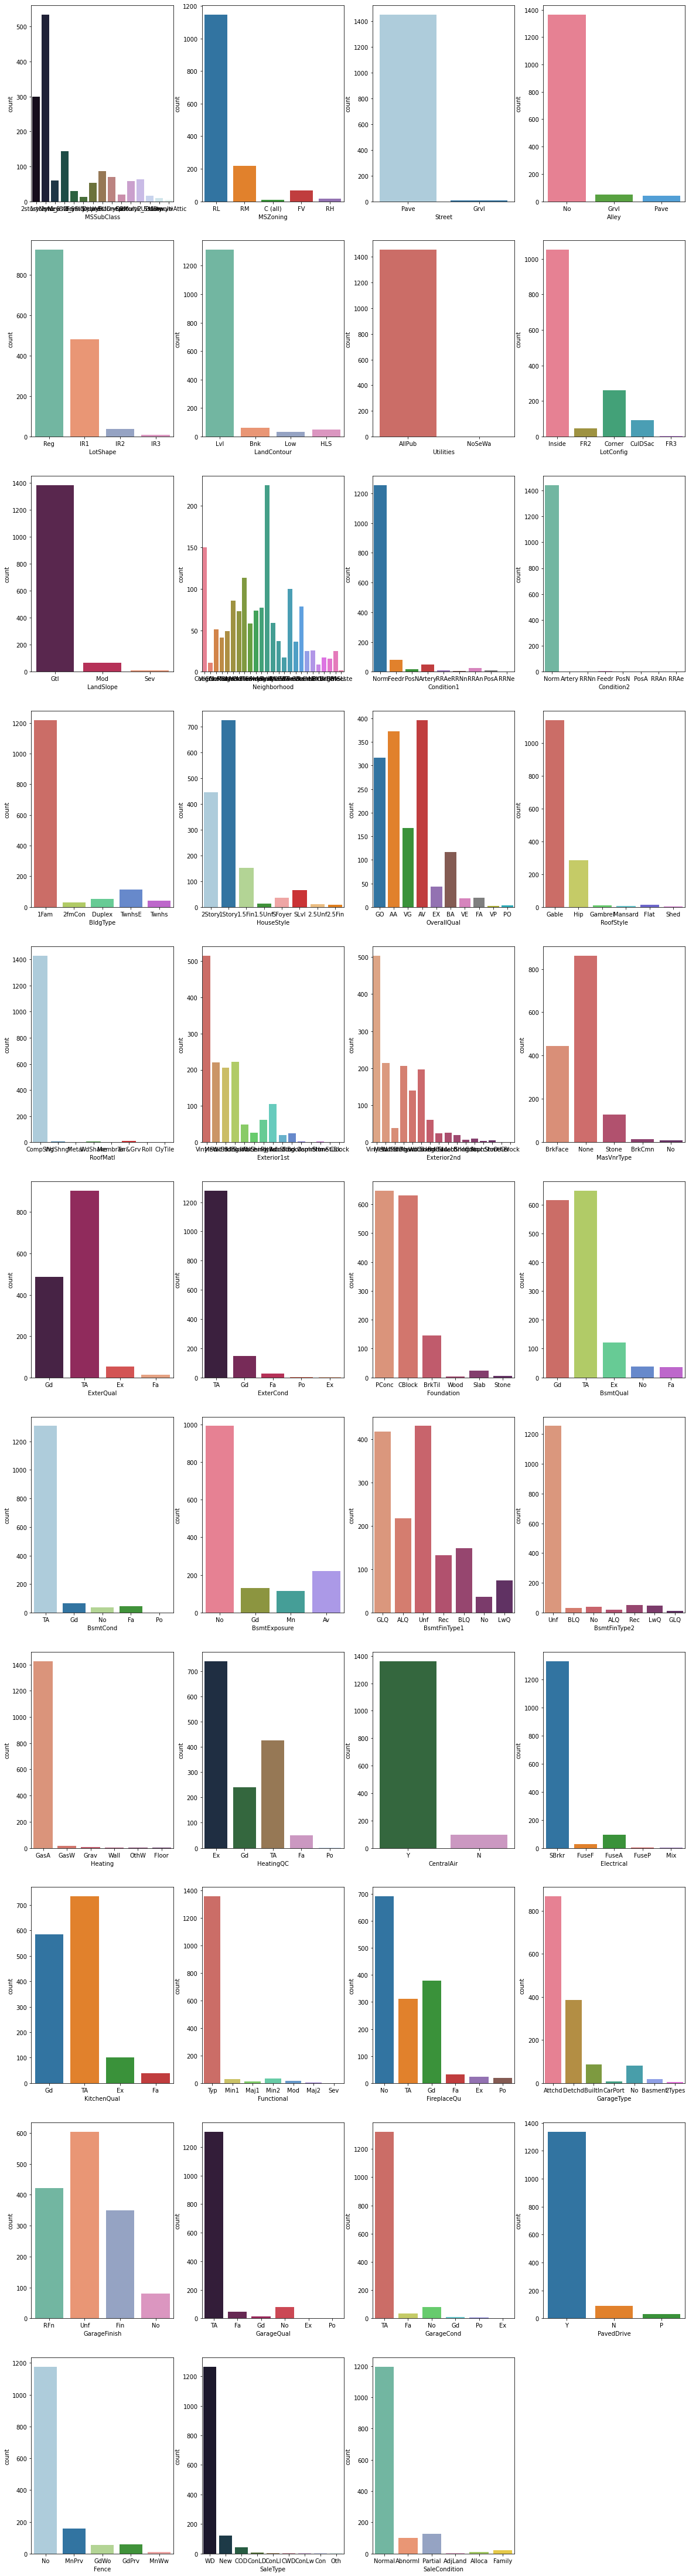

In [44]:
plt.figure(figsize=(20, 80))
r = 1
pal = ["tab10","hls","husl","Set2","Paired","flare","rocket","cubehelix"]
for c in categorical:
    plt.subplot(11, 4, r)
    sns.countplot(data = data,x = c,palette = random.choice(pal))
    r = r + 1
plt.show()

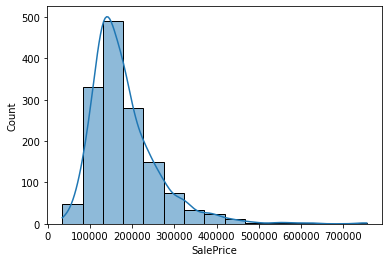

In [45]:
## Data skew in SalePrice
hist_show(data.SalePrice,15)
plt.show()

In [46]:
## Check the skew of the Features
drp = ['Alley','Heating','Functional','Utilities','LandSlope','LandContour','Electrical','Condition1','Condition2']
data.drop(drp,axis=1,inplace=True)
for x in drp:
    categorical.remove(x)

In [47]:
## Create a LogScale for the SalePrice
data['Logsale'] = np.log(data.SalePrice)

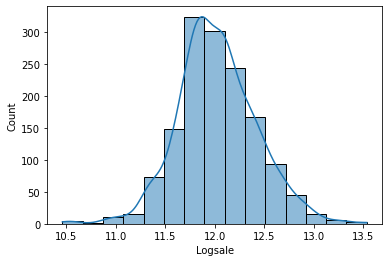

In [48]:
## Visualize LogScale for SalePrice
hist_show(data.Logsale,15)
numerical.append("Logsale")

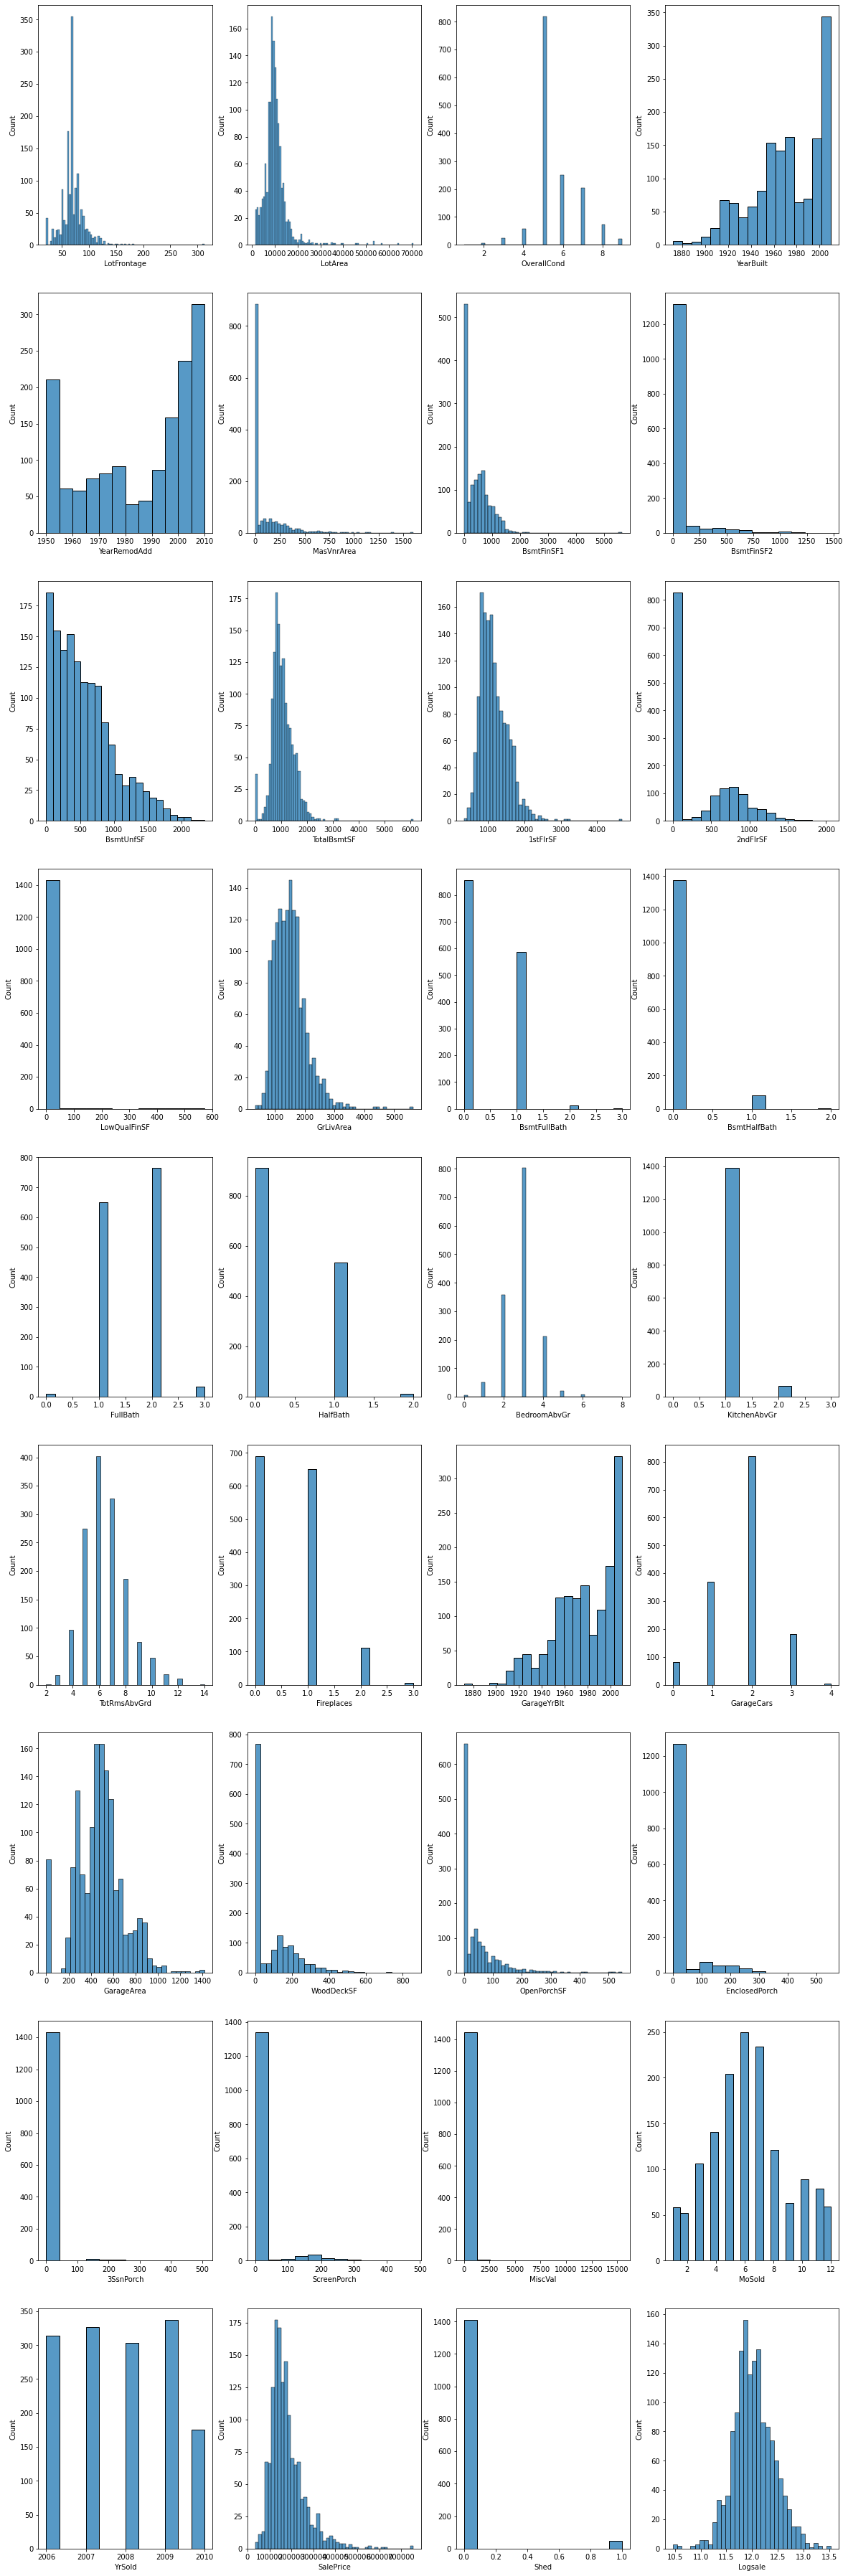

In [49]:
# After the cleanup Vizualize the chceck the numeric columns 
plt.figure(figsize=(20, 80))
r = 1
for n in numerical:
    plt.subplot(11,4,r)
    sns.histplot(data = data,x = n)
    r = r + 1
plt.show()

In [50]:
## shed is highly skewed and categorical and should be dropped 
data.drop("Shed",axis=1,inplace=True)

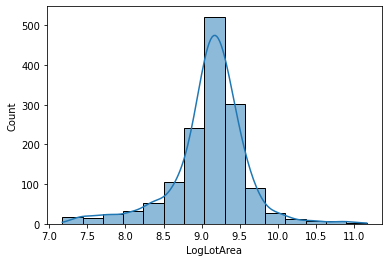

In [51]:
## Normalized with log funtion 
data['LogLotArea'] = np.log(data.LotArea)

## Vizualize the LogLotArea 
hist_show(data.LogLotArea,15)

In [52]:
## Replacing the SalePrice Remove LogSalePrice
data.SalePrice = data.Logsale
data.drop("Logsale", axis = 1,inplace = True)

In [53]:
## Remove the Features from the DF and the List
numerical.remove("Shed")
numerical.remove("Logsale")
data.drop("LotArea",axis=1,inplace=True)
numerical.remove("LotArea")
numerical.append("LogLotArea")

In [54]:
## Convert to Age for Year Built And Years Since Remodel Bais current Year
data['Age'] = 2022 - data.YearBuilt
data['YrSinceRemod'] = 2022 - data.YearRemodAdd

In [55]:
## YrSinceRemod Stats
data.YrSinceRemod.describe()

count    1456.000000
mean       37.133242
std        20.648326
min        12.000000
25%        18.000000
50%        28.000000
75%        55.000000
max        72.000000
Name: YrSinceRemod, dtype: float64

In [56]:
## Age Stats
data.Age.describe()

count    1456.000000
mean       50.714286
std        30.241492
min        12.000000
25%        21.750000
50%        49.000000
75%        68.000000
max       150.000000
Name: Age, dtype: float64

In [57]:
## Drop the YearBuilt and YearRemodAdd
data.drop('YearRemodAdd', axis = 1, inplace = True)
data.drop('YearBuilt', axis = 1, inplace = True)

In [58]:
## 98% - 95% of 3SsnPorch, LowQualFinSF, MiscVal has no data - Drop these Feature
data.drop('3SsnPorch', axis = 1, inplace = True)
data.drop("LowQualFinSF",axis = 1, inplace = True)
data.drop("MiscVal", axis = 1, inplace = True)

In [59]:
## Remove the Features from the Numerical List
for n in ['3SsnPorch',"YearBuilt","YearRemodAdd","LowQualFinSF","MiscVal"]:
    numerical.remove(n)

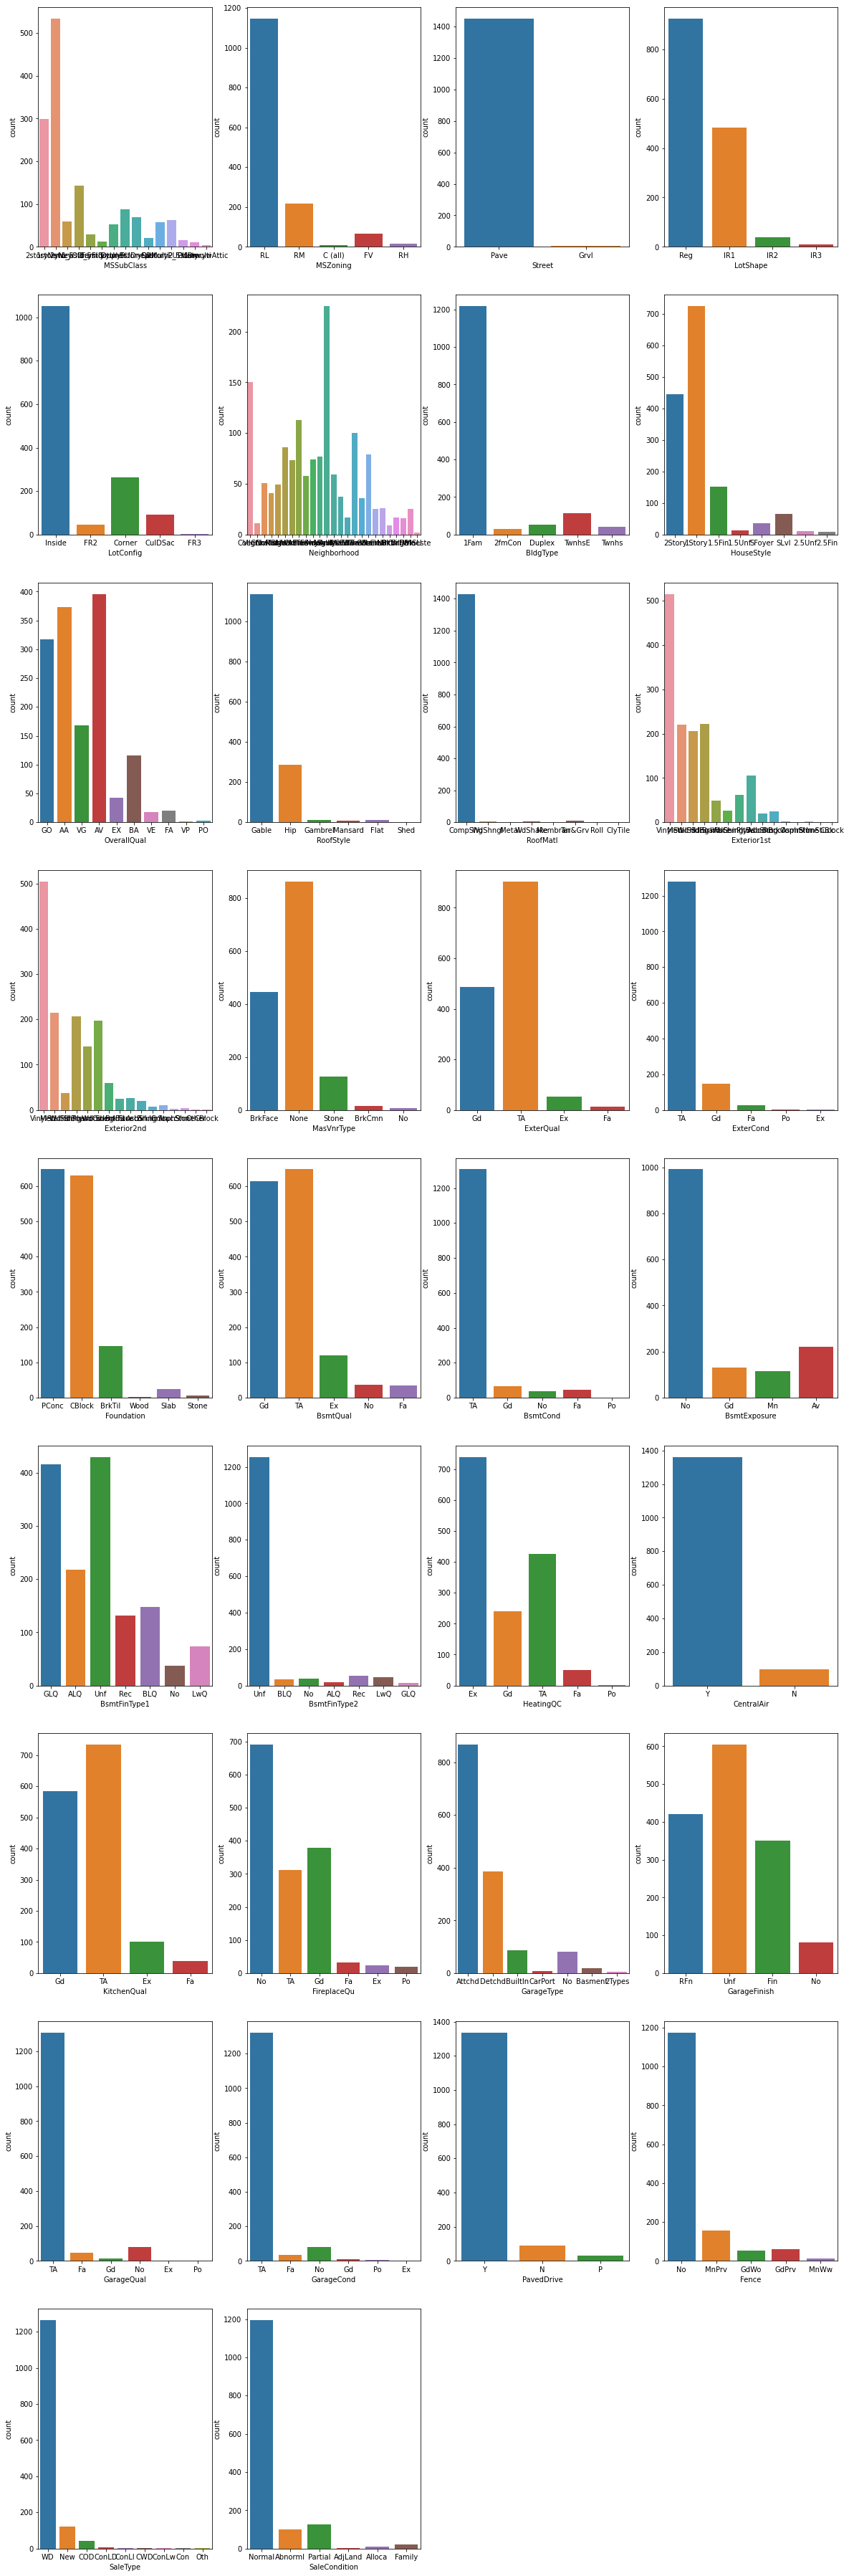

In [60]:
## Recheck the entire Data Set Visually to Identify
plt.figure(figsize = (20, 80))
r = 1
for c in categorical:
    plt.subplot(11, 4, r)
    sns.countplot(data = data, x = c)
    r = r + 1
plt.show()

In [61]:
## Consolidate Fence data to 1 Present and 0 for Absent
data.loc[data.Fence == "NO", "Fence"] = 0
data.loc[data.Fence != 0, "Fence"] = 1

## Consolidation of  Sale type 
data.loc[data.SaleType=="WD","SaleType"] = 1
data.loc[data.SaleType!=1,"SaleType"] = 0

In [62]:
# Feature Street Contains Single value [Gravel < 5%]
data.drop("Street",axis=1,inplace=True)
categorical.remove("Street")

In [63]:
## List of Dummy Variables
dummy = categorical
categorical.remove("SaleType")
categorical.remove("Fence")

In [64]:
## Generic Function to do the Outlier Cleanup

def remove_outlier(dataframe_,feature):
    q1=dataframe_[feature].quantile(0.25)
    q2=dataframe_[feature].quantile(0.75)
    val=1.5*(q2-q1)
    lower_val=q1-val
    upper_val=q2+val
    out_dataframe_ = dataframe_[(dataframe_[feature]>lower_val) & (dataframe_[feature]<upper_val)]
    return out_dataframe_

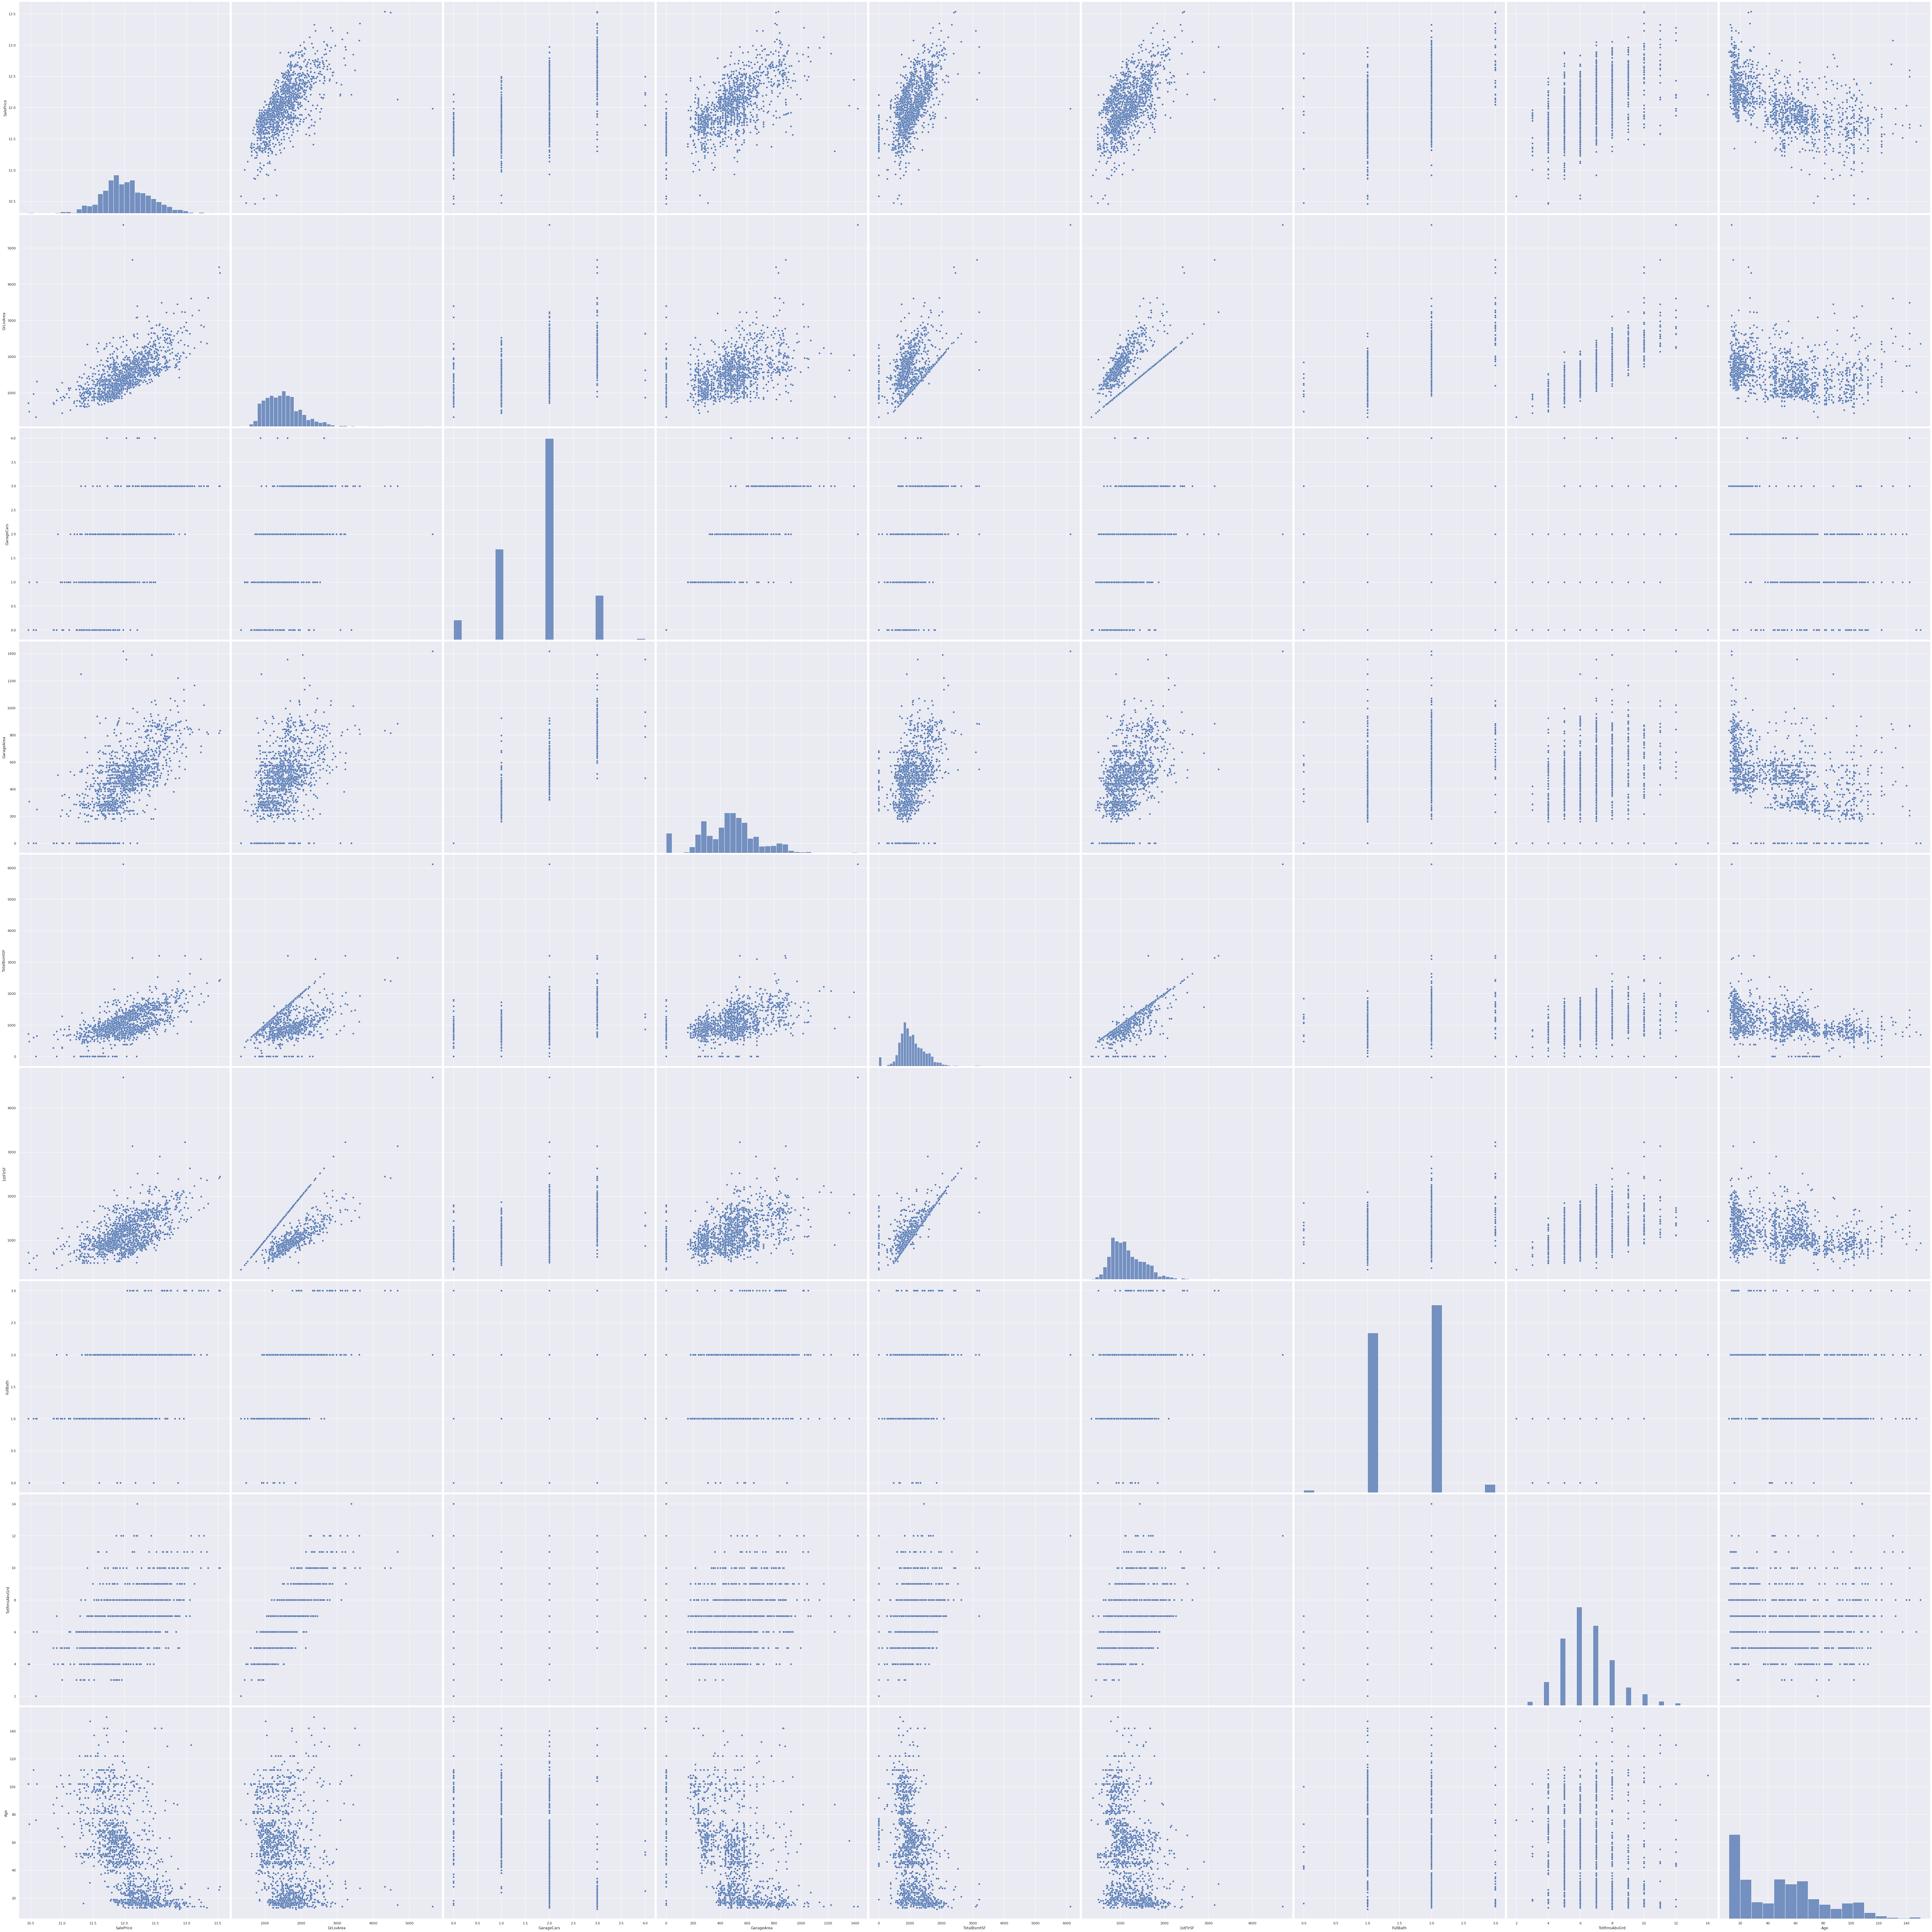

In [65]:
## Data Visualization 
sns.set()
feature = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF','FullBath', 'TotRmsAbvGrd','Age']
sns.pairplot(data[feature], size = 10)
plt.show()

In [66]:
## Outliers removal for GrLivArea
data = remove_outlier(data, "GrLivArea")

In [67]:
numerical.append("Age")

<font color="blue">
No realtion between the age of the house and the sale price. Higher House Prices for larger living areas and larger garages genraly sell at higher prices. House Prices are directly propotional to Number of Garages. Higher prices for houses with higher quality- which is a no brainer

In [68]:
## List of Numerical Features and Categorical Features
numerical = data.select_dtypes(include=["float64","int64"])
print(numerical.columns)
categorical = data.select_dtypes(exclude=["float64","int64"])
print(categorical.columns)

Index(['LotFrontage', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice',
       'LogLotArea', 'Age', 'YrSinceRemod'],
      dtype='object')
Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondit

In [69]:
## Data Transform 
categorical['PavedDrive'] = categorical['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)
categorical['CentralAir'] = categorical['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  


In [70]:
re_dummy = pd.DataFrame()
for x in categorical.columns.to_list():
    temp = pd.get_dummies(categorical[x],drop_first=True,prefix_sep="_",prefix=x)
    re_dummy = pd.concat([re_dummy, temp], axis = 1)
pd.set_option('display.max_columns',None)

re_dummy

MSSubClass_1_5storyUnF  MSSubClass_1storyNew  MSSubClass_1storyOld  \
0                          0                     0                     0   
1                          0                     1                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   
...                      ...                   ...                   ...   
1455                       0                     0                     0   
1456                       0                     1                     0   
1457                       0                     0                     0   
1458                       0                     1                     0   
1459                       0                     1                     0   

      MSSubClass_1storyPUDnew  MSSubClass_1storywAttic  MSSubClass_2Family  \
0                           0                        0                   0   
1                           0                        0                   0   
2                           0                        0                   0   
3                           0                        0                   0   
4                           0                        0                   0   
...                       ...                      ...                 ...   
1455                        0                        0                   0   
1456                        0                        0                   0   
1457                        0                        0                   0   
1458                        0                        0                   0   
1459                        0                        0                   0   

      MSSubClass_2_5story  MSSubClass_2storyNew  MSSubClass_2storyOld  \
0                       0                     1                     0   
1                       0                     0                     0   
2                       0                     1                     0   
3                       0                     0                     1   
4                       0                     1                     0   
...                   ...                   ...                   ...   
1455                    0                     1                     0   
1456                    0                     0                     0   
1457                    0                     0                     1   
1458                    0                     0                     0   
1459                    0                     0                     0   

      MSSubClass_2storyPUDnew  MSSubClass_Duplex  MSSubClass_Multi  \
0                           0                  0                 0   
1                           0                  0                 0   
2                           0                  0                 0   
3                           0                  0                 0   
4                           0                  0                 0   
...                       ...                ...               ...   
1455                        0                  0                 0   
1456                        0                  0                 0   
1457                        0                  0                 0   
1458                        0                  0                 0   
1459                        0                  0                 0   

      MSSubClass_PUDmulti  MSSubClass_Split  MSZoning_FV  MSZoning_RH  \
0                       0                 0            0            0   
1                       0                 0            0            0   
2                       0                 0            0            0   
3                       0                 0            0            0   
4                       0                 0            0            0   


In [71]:
## List of columns that we will scale 
scale_fets = numerical.columns.to_list() 

In [72]:
# Create a Dataframe for the data set

final_df = pd.concat([numerical, re_dummy], axis = 1)

In [73]:
## Standard steps for creating test and train sets of data
## Data Split is at 70:30
## Random State - 79
X=final_df.drop("SalePrice",axis=1)
y=final_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                    train_size=0.7,test_size = 0.3, random_state = 79)


In [74]:
## Some Data Scaling is Required
## MinMax Scaler
scaler = MinMaxScaler()
num_var = numerical.columns.to_list()
num_var.remove("SalePrice")
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])


## Linear Regression - Basic

In [75]:
## Build a basic Linear Regression Model
## With basic Recursive Feature Elimination 
lr = LinearRegression()

lr.fit(X_train, y_train)

rfe = RFE( lr, n_features_to_select = 15)
rfe= rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 64),
 ('OverallCond', False, 17),
 ('MasVnrArea', False, 147),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 126),
 ('2ndFlrSF', False, 137),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 131),
 ('BsmtHalfBath', False, 146),
 ('FullBath', False, 105),
 ('HalfBath', False, 121),
 ('BedroomAbvGr', False, 173),
 ('KitchenAbvGr', False, 167),
 ('TotRmsAbvGrd', False, 174),
 ('Fireplaces', False, 88),
 ('GarageYrBlt', False, 169),
 ('GarageCars', False, 20),
 ('GarageArea', False, 69),
 ('WoodDeckSF', False, 86),
 ('OpenPorchSF', False, 47),
 ('EnclosedPorch', False, 139),
 ('ScreenPorch', False, 61),
 ('MoSold', False, 175),
 ('YrSold', False, 133),
 ('LogLotArea', False, 18),
 ('Age', True, 1),
 ('YrSinceRemod', False, 65),
 ('MSSubClass_1_5storyUnF', False, 165),
 ('MSSubClass_1storyNew', False, 168),
 ('MSSubClass_1storyOld', False, 101),
 ('MSSubClass_1storyPUDnew', False, 188),
 

In [76]:
rfe_fets = X_train.columns[rfe.support_]
list(rfe_fets)

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'Age',
 'MSSubClass_Duplex',
 'BldgType_Duplex',
 'Exterior1st_CBlock',
 'Exterior2nd_CBlock',
 'GarageType_No',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageCond_Fa',
 'GarageCond_No']

In [77]:
drop_fets = X_train.columns[~rfe.support_].to_list
X_train_rfe=X_train[list(rfe_fets)]
lr2 = LinearRegression()
lr2.fit(X_train_rfe,y_train)
LinearRegression()
print(lr2.intercept_)
print(lr2.coef_)

11.428033049638831
[ 0.35527316  0.1076996   0.20140142  0.39559927  1.0528634  -0.58819919
 -0.11211205 -0.11211205 -0.07085217 -0.07085217 -0.07191473  0.1217694
 -0.20030238 -0.0700486  -0.07191473]


In [78]:
## Evaluate Metrics such as R2 score, RSS and RMSE
y_pred_train = lr2.predict(X_train_rfe)
y_pred_test = lr2.predict(X_test[list(rfe_fets)])

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Rss Train:",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Rss Test",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train:",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 Train: 0.8344508940999904
R2 Test 0.7661221743681416
Rss Train: 23.95807918842328
Rss Test 15.13800394504754
MSE Train: 0.024030169697515827
MSE Test 0.03536916809590547


<font color="blue"> We have R2 on Train as 83% and test R2 is 77% which is good but we can try to improve it



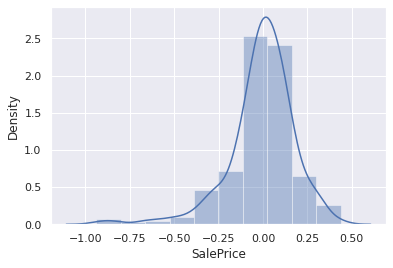

In [79]:
## Plot the Error Distribution
sns.distplot((y_test-y_pred_test), bins = 10)
plt.show()

### Ridge Regression

In [80]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [81]:
## Initialize Ridge 
ridge = Ridge()
# Perform Cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 3.0}


In [82]:
# Ridge model for alpha = 3 
alpha = 3
ridge = Ridge(alpha=alpha)
## Printing coefficients which have been penalised
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.98523128e-02  2.21022697e-01  3.17043535e-02  1.35554277e-01
  5.32428220e-02  7.82432172e-02  1.56230867e-01  1.93533607e-01
  1.37912843e-01  2.47317771e-01  1.92838269e-02  1.23132051e-02
  9.26944801e-02  5.53723409e-02 -3.77112356e-03 -2.66642115e-02
  5.86483727e-02  4.67627875e-02  1.42387181e-02  8.69328071e-02
  7.47301029e-02  6.57757099e-02  8.86274037e-02  4.92595975e-02
  4.95978330e-02  1.63099554e-02 -2.58678593e-02  1.91282787e-01
 -1.28823891e-01 -6.40844431e-02  3.06008151e-03  2.80950657e-02
 -4.71415340e-02  5.01385698e-03 -1.13608769e-02 -2.08730570e-02
  1.38114357e-03  1.24679884e-03  4.80389113e-02 -4.40236020e-02
 -1.57407763e-02  1.39329416e-02 -1.80262962e-02  1.42504347e-02
  4.82243220e-02  4.26228535e-02  4.98717740e-02  1.67168895e-02
  8.12933948e-03 -7.18456165e-03  6.78235347e-03  3.44965229e-02
 -4.67560920e-02 -7.66137980e-03 -1.56023017e-02  0.00000000e+00
  1.22215676e-03  1.83635744e-02  3.13943228e-02 -2.13368231e-02
  1.02166917e-01 -5.38304

In [83]:
## Evaluate Metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)


0.9438740730215907
0.8777224365181984
8.122480612396437
7.914552110177349
0.008146921376526015
0.018491944182657358


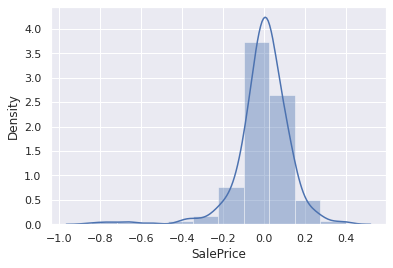

In [84]:
## Plot the Error Distribution
sns.distplot((y_test-y_pred_test), bins=10)
plt.show()

In [85]:
## Initialize Ridge 
lasso = Lasso()
#$ Perform Cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
## Top hyperparameter Alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [87]:
## Fit Lasso model for alpha = 0.0001
alpha =0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
## Printing coefficients which have been penalised
lasso.coef_


array([ 0.03420508,  0.3172905 ,  0.01280644,  0.07871981,  0.02659768,
        0.        ,  0.3382194 ,  0.        ,  0.04417584,  0.54162071,
        0.02017931,  0.00312163,  0.06000638,  0.04006526, -0.00381252,
       -0.        ,  0.        ,  0.02780528,  0.00193221,  0.09964148,
        0.0443707 ,  0.05878111,  0.087794  ,  0.05630497,  0.05381074,
        0.01032831, -0.0239058 ,  0.3007144 , -0.25791197, -0.04838969,
        0.        ,  0.01987678, -0.03032182,  0.        , -0.01461684,
       -0.02192564,  0.        , -0.        ,  0.05482344, -0.03711948,
       -0.04529936,  0.02359139,  0.        ,  0.00972499,  0.04685279,
        0.04569986,  0.04387364,  0.01448384,  0.00069457, -0.        ,
        0.00882612,  0.0304652 , -0.04333441, -0.        , -0.01087383,
        0.        ,  0.        ,  0.02192977,  0.0078472 , -0.02196264,
        0.09749653, -0.05960958, -0.01273571, -0.04913239, -0.1478633 ,
       -0.06736895, -0.04413384,  0.        , -0.04444666,  0.02

In [88]:
lasso.intercept_

11.101129349021948

In [89]:
## Evaluate Metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test:",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Test:",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Train:",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Test:",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Train: 0.945984137867252
R2 Test: 0.87903453296996
RSS Train: 7.817114416727607
RSS Test: 7.829625199259693
MSE Train: 0.007840636325704722
MSE Test: 0.01829351682070022


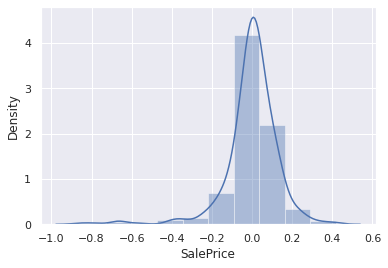

In [90]:
## Plot the Error Distribution
sns.distplot((y_test-y_pred_test), bins=10)
plt.show()

In [91]:
## Tabulate the Results for the three models that we have created
# Tabel that contains all the metrics:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.834451          0.943874          0.945984
1   R2 Score (Test)           0.766122          0.877722          0.879035
2       RSS (Train)          23.958079          8.122481          7.817114
3        RSS (Test)          15.138004          7.914552          7.829625
4       MSE (Train)           0.155017          0.090260          0.088547
5        MSE (Test)           0.188067          0.135985          0.135254

<font color="blue"> Lasso provides the best results

In [92]:
## Coeffcients and Betas
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Linear']= 0
betas

Ridge     Lasso  Linear
LotFrontage            0.059852  0.034205       0
OverallCond            0.221023  0.317291       0
MasVnrArea             0.031704  0.012806       0
BsmtFinSF1             0.135554  0.078720       0
BsmtFinSF2             0.053243  0.026598       0
...                         ...       ...     ...
SaleCondition_AdjLand  0.072661  0.130363       0
SaleCondition_Alloca   0.046620  0.058224       0
SaleCondition_Family  -0.010382 -0.000000       0
SaleCondition_Normal   0.063460  0.065595       0
SaleCondition_Partial  0.072653  0.074313       0

[217 rows x 3 columns]

In [93]:
val = 0
for x in list(X_train_rfe.columns):
    betas.loc[x,"Linear"]= lr2.coef_[val]
    val = val + 1

pd.set_option('display.max_rows', None)

betas.head(224)


Ridge     Lasso    Linear
LotFrontage              0.059852  0.034205  0.000000
OverallCond              0.221023  0.317291  0.000000
MasVnrArea               0.031704  0.012806  0.000000
BsmtFinSF1               0.135554  0.078720  0.355273
BsmtFinSF2               0.053243  0.026598  0.107700
BsmtUnfSF                0.078243  0.000000  0.201401
TotalBsmtSF              0.156231  0.338219  0.395599
1stFlrSF                 0.193534  0.000000  0.000000
2ndFlrSF                 0.137913  0.044176  0.000000
GrLivArea                0.247318  0.541621  1.052863
BsmtFullBath             0.019284  0.020179  0.000000
BsmtHalfBath             0.012313  0.003122  0.000000
FullBath                 0.092694  0.060006  0.000000
HalfBath                 0.055372  0.040065  0.000000
BedroomAbvGr            -0.003771 -0.003813  0.000000
KitchenAbvGr            -0.026664 -0.000000  0.000000
TotRmsAbvGrd             0.058648  0.000000  0.000000
Fireplaces               0.046763  0.027805  0.000000
GarageYrBlt              0.014239  0.001932  0.000000
GarageCars               0.086933  0.099641  0.000000
GarageArea               0.074730  0.044371  0.000000
WoodDeckSF               0.065776  0.058781  0.000000
OpenPorchSF              0.088627  0.087794  0.000000
EnclosedPorch            0.049260  0.056305  0.000000
ScreenPorch              0.049598  0.053811  0.000000
MoSold                   0.016310  0.010328  0.000000
YrSold                  -0.025868 -0.023906  0.000000
LogLotArea               0.191283  0.300714  0.000000
Age                     -0.128824 -0.257912 -0.588199
YrSinceRemod            -0.064084 -0.048390  0.000000
MSSubClass_1_5storyUnF   0.003060  0.000000  0.000000
MSSubClass_1storyNew     0.028095  0.019877  0.000000
MSSubClass_1storyOld    -0.047142 -0.030322  0.000000
MSSubClass_1storyPUDnew  0.005014  0.000000  0.000000
MSSubClass_1storywAttic -0.011361 -0.014617  0.000000
MSSubClass_2Family      -0.020873 -0.021926  0.000000
MSSubClass_2_5story      0.001381  0.000000  0.000000
MSSubClass_2storyNew     0.001247 -0.000000  0.000000
MSSubClass_2storyOld     0.048039  0.054823  0.000000
MSSubClass_2storyPUDnew -0.044024 -0.037119  0.000000
MSSubClass_Duplex       -0.015741 -0.045299 -0.112112
MSSubClass_Multi         0.013933  0.023591  0.000000
MSSubClass_PUDmulti     -0.018026  0.000000  0.000000
MSSubClass_Split         0.014250  0.009725  0.000000
MSZoning_FV              0.048224  0.046853  0.000000
MSZoning_RH              0.042623  0.045700  0.000000
MSZoning_RL              0.049872  0.043874  0.000000
MSZoning_RM              0.016717  0.014484  0.000000
LotShape_IR2             0.008129  0.000695  0.000000
LotShape_IR3            -0.007185 -0.000000  0.000000
LotShape_Reg             0.006782  0.008826  0.000000
LotConfig_CulDSac        0.034497  0.030465  0.000000
LotConfig_FR2           -0.046756 -0.043334  0.000000
LotConfig_FR3           -0.007661 -0.000000  0.000000
LotConfig_Inside        -0.015602 -0.010874  0.000000
Neighborhood_Blueste     0.000000  0.000000  0.000000
Neighborhood_BrDale      0.001222  0.000000  0.000000
Neighborhood_BrkSide     0.018364  0.021930  0.000000
Neighborhood_ClearCr     0.031394  0.007847  0.000000
Neighborhood_CollgCr    -0.021337 -0.021963  0.000000
Neighborhood_Crawfor     0.102167  0.097497  0.000000
Neighborhood_Edwards    -0.053830 -0.059610  0.000000
Neighborhood_Gilbert    -0.014580 -0.012736  0.000000
Neighborhood_IDOTRR     -0.050647 -0.049132  0.000000
Neighborhood_MeadowV    -0.107596 -0.147863  0.000000
Neighborhood_Mitchel    -0.055082 -0.067369  0.000000
Neighborhood_NAmes      -0.040644 -0.044134  0.000000
Neighborhood_NPkVill     0.020709  0.000000  0.000000
Neighborhood_NWAmes     -0.035281 -0.044447  0.000000
Neighborhood_NoRidge     0.039410  0.028957  0.000000
Neighborhood_NridgHt     0.062545  0.051881  0.000000
Neighborhood_OldTown    -0.041947 -0.040194  0.000000
Neighborhood_SWISU       0.017738  0.019723  0.000000
Neighborhood_Sawyer     -0.02883

In [94]:
## Finding 10 most important featues of these models 
betas["ABSRidge"]=abs(betas["Ridge"])
betas['ABSLasso']=abs(betas["Lasso"])
betas['ABSLinear']=abs(betas['Linear'])

betas["RidgeRank"]=betas["ABSRidge"].rank()
betas["LassoRank"]=betas["ABSLasso"].rank()
betas["LinearRank"]=betas["ABSLinear"].rank()

Ridge_imp = pd.DataFrame(betas.sort_values(by="RidgeRank",ascending= False).head(10).Ridge)
Lasso_imp = pd.DataFrame(betas.sort_values(by="LassoRank",ascending= False).head(10).Lasso)
Linear_imp = pd.DataFrame(betas.sort_values(by="LinearRank",ascending= False).head(10).Linear)
out="Ridge Regression:\n("
for x in range(len(Ridge_imp)):
    out=out+str(Ridge_imp.index[x])+"*"+str(round(Ridge_imp['Ridge'][x],3))+")"
    if x!=len(Ridge_imp)-1:
        out=out+"\n("
        
print(out)

Ridge Regression:
(GrLivArea*0.247)
(OverallCond*0.221)
(1stFlrSF*0.194)
(LogLotArea*0.191)
(OverallQual_FA*-0.182)
(TotalBsmtSF*0.156)
(2ndFlrSF*0.138)
(BsmtFinSF1*0.136)
(Age*-0.129)
(OverallQual_EX*0.122)


In [95]:
out="Lasso Regression:\n("
for x in range(len(Lasso_imp)):
    out=out+Lasso_imp.index[x]+"*"+str(round(Lasso_imp['Lasso'][x],3))+")"
    if x!=len(Lasso_imp)-1:
        out=out+"\n("
        
print(out)

Lasso Regression:
(GrLivArea*0.542)
(TotalBsmtSF*0.338)
(OverallCond*0.317)
(LogLotArea*0.301)
(Age*-0.258)
(OverallQual_FA*-0.206)
(OverallQual_VP*-0.158)
(Neighborhood_MeadowV*-0.148)
(OverallQual_EX*0.146)
(OverallQual_VE*0.135)


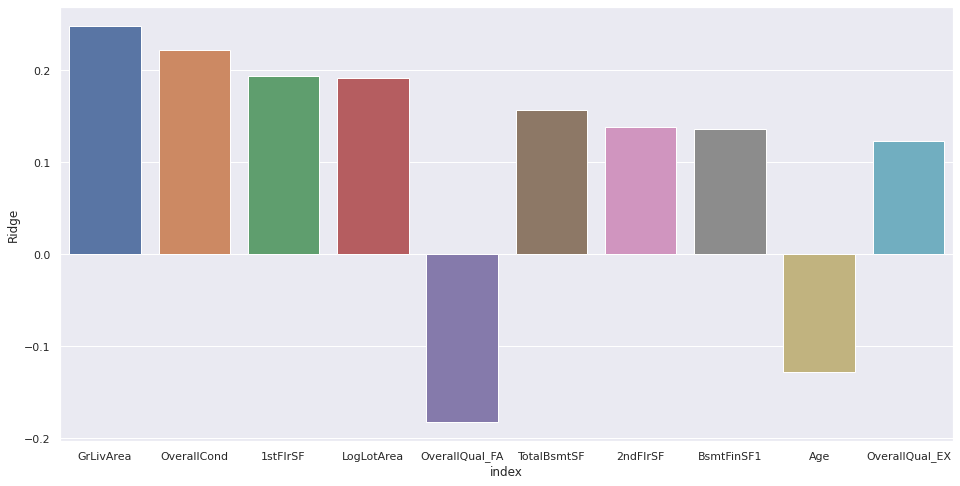

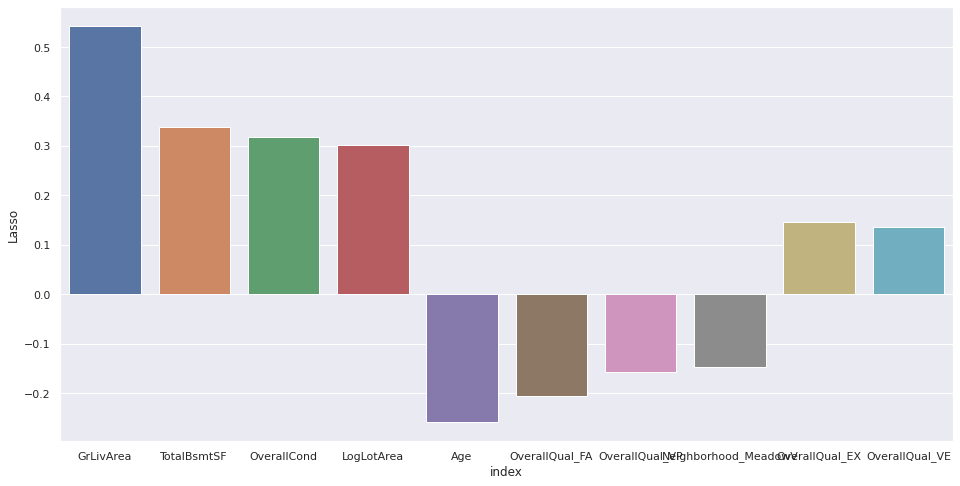

In [96]:
## Visualization and the Evaluation of the Features
Ridge_imp=Ridge_imp.reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x="index",y="Ridge",data=Ridge_imp)

Lasso_imp=Lasso_imp.reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x="index",y="Lasso",data=Lasso_imp)
plt.show()


In [97]:
Lasso_imp

index     Lasso
0             GrLivArea  0.541621
1           TotalBsmtSF  0.338219
2           OverallCond  0.317291
3            LogLotArea  0.300714
4                   Age -0.257912
5        OverallQual_FA -0.205575
6        OverallQual_VP -0.158424
7  Neighborhood_MeadowV -0.147863
8        OverallQual_EX  0.145632
9        OverallQual_VE  0.134823

<font color="blue"> Ridge and Lasso have produced higher results compared to Basic
----------------
R2 Score (Train)
Ridge 94.3% <p>
Lasso 94.5% <p>
---------------
R2 Score (Test)		
Ridge 87.7%  <p>
Lasso 87.9% <p>


In [98]:
## Create Ridge Model with Double the value of Alphas
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.04982469  0.18025477  0.03724579  0.12448248  0.04035502  0.06931653
  0.13862077  0.18168542  0.11497002  0.22598867  0.01937314  0.00808786
  0.08856004  0.05536213  0.00842602 -0.01988974  0.07096589  0.04740991
  0.01665989  0.08419033  0.07598135  0.0623058   0.0843868   0.04382528
  0.04569359  0.01786251 -0.02534374  0.14986776 -0.09197808 -0.07310909
  0.0051397   0.03191765 -0.05349004  0.00299941 -0.00367721 -0.01742668
  0.00231362  0.00258354  0.04500649 -0.04316301 -0.0108582   0.01035075
 -0.02151543  0.0118361   0.03376603  0.02623602  0.03871099 -0.00151219
  0.00957922 -0.00520372  0.00394735  0.03522083 -0.04370934 -0.00576913
 -0.01672114  0.         -0.00164881  0.0149333   0.03397505 -0.02179935
  0.09595647 -0.0500865  -0.01921663 -0.04332154 -0.0830871  -0.04579572
 -0.03895453  0.01781681 -0.02828189  0.036562    0.0665165  -0.03871441
  0.01286348 -0.02606796 -0.01296089  0.0433722   0.09613607 -0.01308962
  0.02194152 -0.00994952 -0.0108582  -0.03019301 -0

In [99]:
## Evaluate Metrics
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.9398116609383611
0.8759532417045797


In [100]:
betas3 = pd.DataFrame(index=X_train.columns)
betas3.rows = X_train.columns
betas3['Ridge'] = ridge.coef_
betas3["ABSRidge"]=abs(betas3["Ridge"])
betas3["RidgeRank"]=betas3["ABSRidge"].rank()

Ridge_imp2=pd.DataFrame(betas3.sort_values(by="RidgeRank",ascending= False).head(10).Ridge)
out="Ridge Regression:\n("
for x in range(len(Ridge_imp2)):
    out=out+str(Ridge_imp2.index[x])+"*"+str(round(Ridge_imp2['Ridge'][x],3))+")"
    if x!=len(Ridge_imp2)-1:
        out=out+"\n("
        
print(out)

Ridge Regression:
(GrLivArea*0.226)
(1stFlrSF*0.182)
(OverallCond*0.18)
(OverallQual_FA*-0.154)
(LogLotArea*0.15)
(TotalBsmtSF*0.139)
(BsmtFinSF1*0.124)
(2ndFlrSF*0.115)
(OverallQual_EX*0.114)
(Neighborhood_StoneBr*0.096)


In [101]:
# Create Lasso Model With double alpha value .
lasso2 = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
## Double the Lasso to .0002 from .0001
alpha =0.0002
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [103]:
## Evaluate Metrics
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test:",r2_test_lr)

R2 Train: 0.9433798850077192
R2 Test: 0.8799406366072685


In [104]:
betas4 = pd.DataFrame(index=X_train.columns)
betas4.rows = X_train.columns
betas4['Lasso'] = lasso2.coef_
betas4["ABSLasso"]=abs(betas4["Lasso"])
betas4["LassoRank"]=betas4["ABSLasso"].rank()
Lasso_imp2=pd.DataFrame(betas4.sort_values(by="LassoRank",ascending= False).head(10).Lasso)
out="Lasso Regression:\n("
for x in range(len(Lasso_imp2)):
    out=out+str(Lasso_imp2.index[x])+"*"+str(round(Lasso_imp2['Lasso'][x],3))+")"
    if x!=len(Lasso_imp2)-1:
        out=out+"\n("
        
print(out)

Lasso Regression:
(GrLivArea*0.568)
(TotalBsmtSF*0.331)
(OverallCond*0.324)
(LogLotArea*0.291)
(Age*-0.252)
(OverallQual_FA*-0.191)
(OverallQual_EX*0.149)
(OverallQual_VE*0.132)
(Neighborhood_MeadowV*-0.125)
(GarageCars*0.116)


In [105]:
# Building the lasso model not including the significant features
dro_cols=["GrLivArea","TotalBsmtSF","MSZoning_FV","MSZoning_RH","MSZoning_RL"]
X_train_miss=X_train.drop(dro_cols,axis=1)

In [106]:
## Initialize Lasso and Build the Model
lasso2 = Lasso()
# cross validation
model_cv2 = GridSearchCV(estimator = lasso2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train_miss, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
print(model_cv2.best_params_)
alpha =0.0001
lasso2= Lasso(alpha=alpha)
lasso2.fit(X_train_miss, y_train)

{'alpha': 0.0001}


Lasso(alpha=0.0001)

In [108]:
## Final Evaluation of the model
X_test_miss=X_test.drop(dro_cols,axis=1)
y_pred_train = lasso2.predict(X_train_miss)
y_pred_test = lasso2.predict(X_test_miss)
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train:",r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test:",r2_test_lr)
betas2 = pd.DataFrame(index=X_train_miss.columns)
betas2.rows = X_train_miss.columns
betas2['Lasso'] = lasso2.coef_
betas2['ABSLasso']=abs(betas2["Lasso"])
betas2["LassoRank"]=betas2["ABSLasso"].rank()
Lasso_imp2=pd.DataFrame(betas2.sort_values(by="LassoRank",ascending= False).head(10).Lasso)
out="Lasso Regression:\n("
for x in range(len(Lasso_imp)):
    out=out+Lasso_imp2.index[x]+"*"+str(round(Lasso_imp2['Lasso'][x],3))+")"
    if x!=len(Lasso_imp2)-1:
        out=out+"\n("
        
print(out)

R2 Train: 0.9456140073760225
R2 Test: 0.8746416699089321
Lasso Regression:
(1stFlrSF*0.469)
(2ndFlrSF*0.356)
(OverallCond*0.319)
(LogLotArea*0.306)
(BsmtFinSF1*0.263)
(Age*-0.256)
(BsmtUnfSF*0.223)
(OverallQual_FA*-0.21)
(OverallQual_VP*-0.156)
(Neighborhood_MeadowV*-0.153)


<font color="green">
R2 Train: 95% 
R2 Test: 87.4%
<p> End of Assignment